In [1]:
import pandas as pd
import numpy as np

In [2]:
# packages for path locations
import os
import sys

In [3]:
# package scripts in the script module folder 
sys.path.insert(0,'../scripts/')
from data_exploration import exploration
from data_preProcessing import data_preProcessing_script

In [4]:
#importing the some libraries for the project
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import *
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Reading the clean data csv sheet
pd.set_option('max_column', None)
df=pd.read_csv('../data/cleaned_telecom_data.csv')
df.head()

,MSISDN/Number,no.of xDR sessions,Total Uploads,Total Downloads,Total UL and DL,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Start ms,End ms,Start,End,Avg Delay (ms),Dur. (ms),Dur. (ms).1,Activity_Duration(ms),Avg Throughput (kbps),Handset Manufacturer,Handset Type,Last Location Name,IMSI,IMEI
0,3.360100e+10,1,3.674974e+13,4.806241e+14,5.173738e+14,1.835594e+13,2.905912e+12,3.701304e+12,1.570185e+12,1.785519e+13,2.924265e+14,1.805588e+14,770.0,662.0,2019-04-04 12:01:18,2019-04-25 14:35:31,47.0,1823652.0,1.823653e+09,76411.0,67.0,Samsung,Samsung Galaxy A5 Sm-A520F,9164566995485190,2.082014e+14,3.552121e+13
1,3.360100e+10,1,5.380039e+13,1.180289e+15,1.234090e+15,3.935912e+13,4.414096e+12,9.373850e+11,1.933278e+12,3.556554e+13,6.099208e+14,5.419594e+14,235.0,606.0,2019-04-09 13:04:04,2019-04-25 08:15:48,70.0,1365104.0,1.365104e+09,3728.0,42.0,Samsung,Samsung Galaxy J5 (Sm-J530),L77566A,2.082019e+14,3.579401e+13
2,3.360100e+10,1,2.788364e+13,6.904999e+14,7.183836e+14,3.442524e+13,1.022912e+13,3.363124e+12,1.726277e+12,2.375120e+13,2.299803e+14,4.149084e+14,1.0,652.0,2019-04-09 17:42:11,2019-04-25 11:58:13,70.0,1361762.0,1.361763e+09,0.0,15.0,Samsung,Samsung Galaxy A8 (2018),D42335A,2.082003e+14,3.528151e+13
3,3.360101e+10,1,4.332422e+13,1.595068e+15,1.638393e+15,3.653476e+13,1.181176e+13,2.070983e+12,6.574930e+11,1.509259e+13,8.103879e+14,7.618372e+14,486.0,171.0,2019-04-10 00:31:25,2019-04-25 07:36:35,70.0,1321509.0,1.321510e+09,41212.0,88.0,undefined,undefined,T21824A,2.082014e+14,3.535661e+13
4,3.360101e+10,2,3.854281e+13,1.119848e+15,1.158391e+15,3.422225e+13,7.748843e+12,2.110349e+12,9.127880e+11,1.753980e+13,5.312370e+14,5.646198e+14,565.0,954.0,2019-04-12 20:10:23,2019-04-25 10:40:32,70.0,1089009.0,1.089009e+09,0.0,15.0,Samsung,Samsung Sm-G390F,D88865A,2.082014e+14,3.540701e+13


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106856 entries, 0 to 106855
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   MSISDN/Number            106856 non-null  float64
 1   no.of xDR sessions       106856 non-null  int64  
 2   Total Uploads            106856 non-null  float64
 3   Total Downloads          106856 non-null  float64
 4   Total UL and DL          106856 non-null  float64
 5   Youtube_Total_Data       106856 non-null  float64
 6   Google_Total_Data        106856 non-null  float64
 7   Email_Total_Data         106856 non-null  float64
 8   Social_Media_Total_Data  106856 non-null  float64
 9   Netflix_Total_Data       106856 non-null  float64
 10  Gaming_Total_Data        106856 non-null  float64
 11  Other_Total_Data         106856 non-null  float64
 12  Start ms                 106856 non-null  float64
 13  End ms                   106856 non-null  float64
 14  Star

### Numerical data 

In [7]:
df._get_numeric_data().columns

Index(['MSISDN/Number', 'no.of xDR sessions', 'Total Uploads',
       'Total Downloads', 'Total UL and DL', 'Youtube_Total_Data',
       'Google_Total_Data', 'Email_Total_Data', 'Social_Media_Total_Data',
       'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data',
       'Start ms', 'End ms', 'Avg Delay (ms)', 'Dur. (ms)', 'Dur. (ms).1',
       'Activity_Duration(ms)', 'Avg Throughput (kbps)', 'IMSI', 'IMEI'],
      dtype='object')

### Catagorical data

In [8]:
cols = df.columns

In [9]:
numer_cols = df._get_numeric_data().columns

In [10]:
list(set(cols) - set(numer_cols))

['Last Location Name', 'Start', 'Handset Type', 'Handset Manufacturer', 'End']

In [11]:
cols = ['IMSI','Handset Manufacturer','Handset Type','IMEI','MSISDN/Number','Last Location Name']

In [12]:
try:
    for col in cols:
        df[col] = df[col].astype('category')
except:
    print("can't change to categorycal")

In [13]:
cols = df.columns

In [14]:
numer_cols = df._get_numeric_data().columns
list(set(cols) - set(numer_cols))

['Last Location Name',
 'MSISDN/Number',
 'Start',
 'Handset Type',
 'IMSI',
 'IMEI',
 'Handset Manufacturer',
 'End']

## Data Exploration

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106856 entries, 0 to 106855
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   MSISDN/Number            106856 non-null  category
 1   no.of xDR sessions       106856 non-null  int64   
 2   Total Uploads            106856 non-null  float64 
 3   Total Downloads          106856 non-null  float64 
 4   Total UL and DL          106856 non-null  float64 
 5   Youtube_Total_Data       106856 non-null  float64 
 6   Google_Total_Data        106856 non-null  float64 
 7   Email_Total_Data         106856 non-null  float64 
 8   Social_Media_Total_Data  106856 non-null  float64 
 9   Netflix_Total_Data       106856 non-null  float64 
 10  Gaming_Total_Data        106856 non-null  float64 
 11  Other_Total_Data         106856 non-null  float64 
 12  Start ms                 106856 non-null  float64 
 13  End ms                   106856 non-null  fl

In [16]:
inform = data_preProcessing_script(df)
inform.show_data_description()

,no.of xDR sessions,Total Uploads,Total Downloads,Total UL and DL,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Start ms,End ms,Avg Delay (ms),Dur. (ms),Dur. (ms).1,Activity_Duration(ms),Avg Throughput (kbps)
count,106856.000000,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,106856.00000,106856.000000,106856.000000,1.068560e+05,1.068560e+05,1.068560e+05,106856.000000
mean,1.403768,4.110601e+13,8.755117e+14,9.166177e+14,2.261432e+13,7.807186e+12,2.256312e+12,1.829234e+12,2.263888e+13,4.306893e+14,4.287825e+14,500.04668,498.819608,128.501291,9.662336e+04,9.662390e+07,2.940389e+06,14911.826814
std,0.815371,1.129677e+13,3.443597e+14,3.445153e+14,9.247766e+12,3.518899e+12,1.070585e+12,1.035324e+12,9.263578e+12,2.441595e+14,2.434219e+14,288.70693,288.344458,662.797324,8.395441e+04,8.395440e+07,9.624583e+06,26323.111201
min,1.000000,4.469240e+12,1.516948e+13,5.836229e+13,1.296550e+11,4.033000e+10,8.359000e+09,2.003000e+09,9.843200e+10,5.953750e+11,1.490450e+11,0.00000,0.000000,0.000000,7.142000e+03,7.142988e+06,0.000000e+00,0.000000
25%,1.000000,3.316944e+13,6.280894e+14,6.691826e+14,1.598535e+13,4.938135e+12,1.356211e+12,9.347748e+11,1.599168e+13,2.189957e+14,2.172528e+14,251.00000,252.000000,37.000000,4.085950e+04,4.086000e+07,3.483275e+04,91.000000
50%,1.000000,4.112088e+13,8.760625e+14,9.166781e+14,2.263187e+13,7.815112e+12,2.261322e+12,1.827609e+12,2.263623e+13,4.317391e+14,4.295621e+14,500.00000,499.500000,52.000000,8.639900e+04,8.639990e+07,8.780350e+04,135.000000
75%,2.000000,4.902461e+13,1.123551e+15,1.164285e+15,2.925176e+13,1.068372e+13,3.156982e+12,2.725866e+12,2.931266e+13,6.418924e+14,6.396096e+14,750.00000,751.000000,88.000000,1.188535e+05,1.188538e+08,1.167671e+06,22066.750000
max,18.000000,7.833131e+13,1.735683e+15,1.780674e+15,4.519008e+13,1.552878e+13,4.518036e+12,3.650861e+12,4.519815e+13,8.592028e+14,8.595209e+14,999.00000,999.000000,96924.000000,1.823652e+06,1.823653e+09,2.194264e+08,300546.000000


# Univariant Analysis

## Total UL and DL

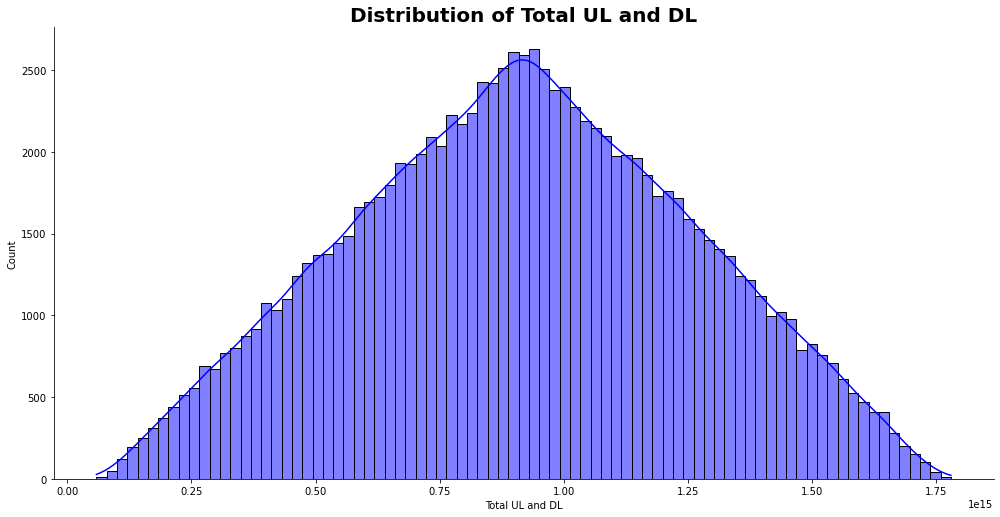

In [19]:
exploration.plot_hist(df, 'Total UL and DL', 'blue')

In [24]:
df.describe()['Total UL and DL']

count    1.068560e+05
mean     9.166177e+14
std      3.445153e+14
min      5.836229e+13
25%      6.691826e+14
50%      9.166781e+14
75%      1.164285e+15
max      1.780674e+15
Name: Total UL and DL, dtype: float64

## Youtube Total Data

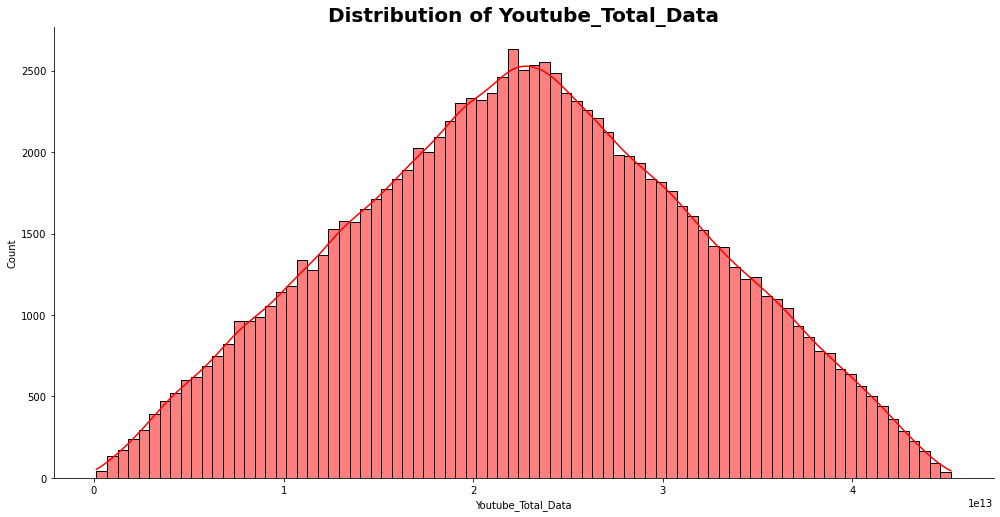

In [22]:
exploration.plot_hist(df, 'Youtube_Total_Data', 'red')

In [30]:
df.describe()['Youtube_Total_Data']

count    1.068560e+05
mean     2.261432e+13
std      9.247766e+12
min      1.296550e+11
25%      1.598535e+13
50%      2.263187e+13
75%      2.925176e+13
max      4.519008e+13
Name: Youtube_Total_Data, dtype: float64

## Google Total Data

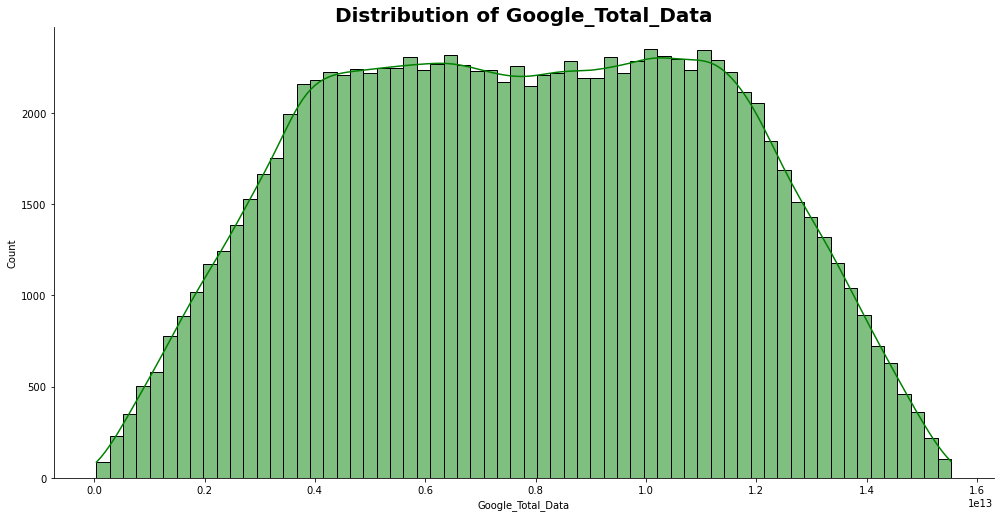

In [31]:
exploration.plot_hist(df, 'Google_Total_Data', 'green')

In [29]:
df.describe()['Google_Total_Data']

count    1.068560e+05
mean     7.807186e+12
std      3.518899e+12
min      4.033000e+10
25%      4.938135e+12
50%      7.815112e+12
75%      1.068372e+13
max      1.552878e+13
Name: Google_Total_Data, dtype: float64

In [ ]:
exploration.plot_hist(df, 'Google_Total_Data', 'green')

In [ ]:
df.describe()['Google_Total_Data']

In [26]:
 'Email_Total_Data'  'Social_Media_Total_Data' 'Netflix_Total_Data' 'Gaming_Total_Data'
'Other_Total_Data'

'Google_Total_Data'